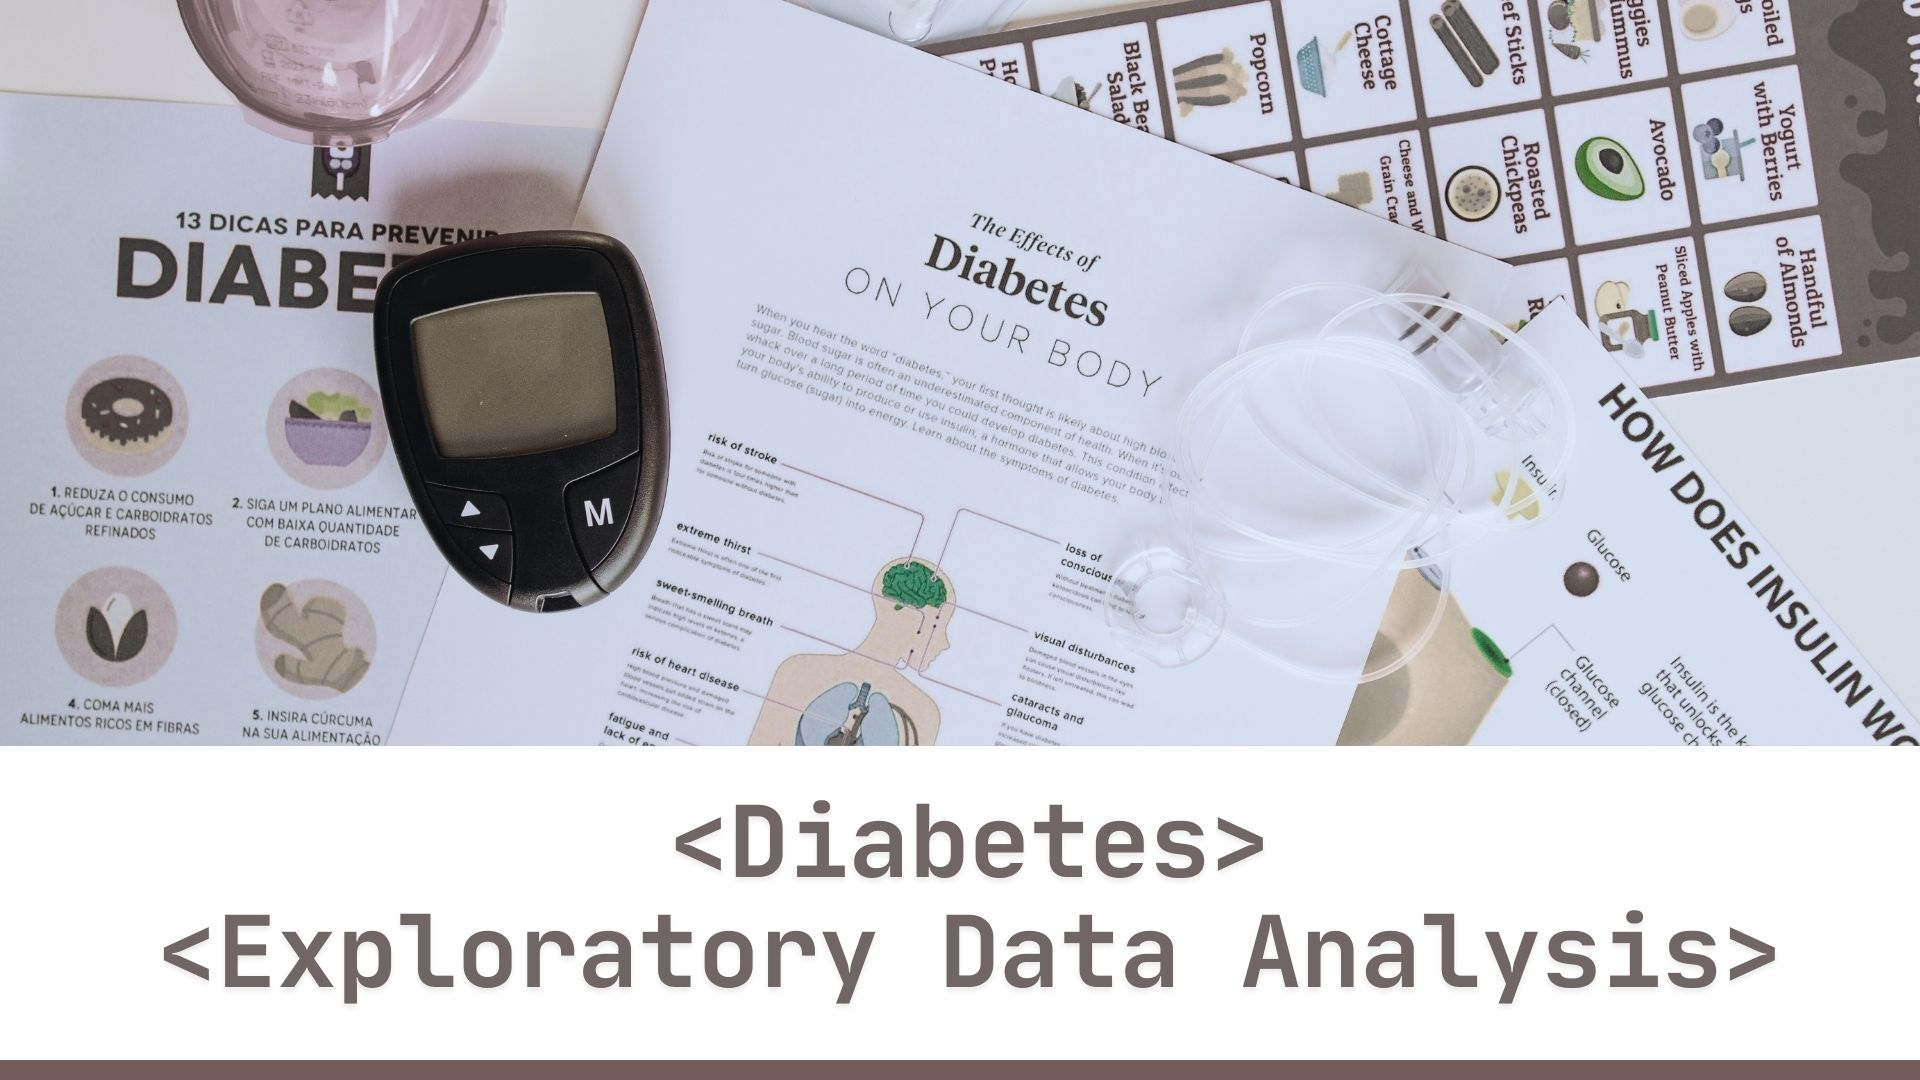

Diabetes Dataset: www.kaggle.com/datasets/prosperchuks/health-dataset?select=diabetes_data.csv

# 1. Uploading Libraries

In [1]:
# Data Manipulation & Analysis
import numpy as np  
import pandas as pd  
import os
import random

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  
import missingno as msno 

# Model Building
from sklearn.model_selection import train_test_split, GridSearchCV, KFold  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  

# Model Evaluation
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

# 2. Uploading and Analyzing Dataset

In [2]:
df = pd.read_csv("/kaggle/input/health-dataset/diabetes_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [3]:
# Add missing values to the dataset
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

df = add_random_missing_values(df, missing_rate=0.02)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   69293 non-null  float64
 1   Sex                   69295 non-null  float64
 2   HighChol              69293 non-null  float64
 3   CholCheck             69305 non-null  float64
 4   BMI                   69278 non-null  float64
 5   Smoker                69274 non-null  float64
 6   HeartDiseaseorAttack  69271 non-null  float64
 7   PhysActivity          69356 non-null  float64
 8   Fruits                69331 non-null  float64
 9   Veggies               69265 non-null  float64
 10  HvyAlcoholConsump     69288 non-null  float64
 11  GenHlth               69281 non-null  float64
 12  MentHlth              69320 non-null  float64
 13  PhysHlth              69273 non-null  float64
 14  DiffWalk              69280 non-null  float64
 15  Stroke             

After loading the dataset, random missing values were introduced, leading to a decrease in the number of non-null values.

In [5]:
print(f"The dataset contains {len(df.columns)} columns:")
print(list(df.columns))

The dataset contains 18 columns:
['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']


In [6]:
df.head(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,NaN,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,NaN,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,NaN,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,NaN,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,NaN,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,NaN,0.0,1.0,27.0,1.0,0.0,0.0,NaN,1.0,0.0,3.0,NaN,6.0,0.0,0.0,0.0,0.0


In [7]:
df.tail(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
70682,9.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,30.0,1.0,0.0,1.0,1.0
70683,10.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
70684,9.0,1.0,1.0,1.0,27.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,30.0,5.0,0.0,NaN,1.0,1.0
70685,7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
70686,11.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,30.0,0.0,0.0,0.0,1.0
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,NaN,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,NaN,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0
70691,9.0,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0


# 3. Variable Details & Analysis

**1. Age =** Represents the age group of the patient. The "13-level age category (_AGEG5YR)" used here is a classification that categorizes the population into age ranges. The corresponding age ranges for each value are:

* 1 = 18-24
* 2 = 25-29
* 3 = 30-34
* 4 = 35-39
* 5 = 40-44
* 6 = 45-49
* 7 = 50-54
* 8 = 55-59
* 9 = 60-64
* 10 = 65-69
* 11 = 70-74
* 12 = 75-79
* 13 = 80 and above
  
**2. Sex =** The gender of the patient. "1" is used for male patients, and "0" is used for female patients.

**3. HighChol =** The cholesterol status of the patient. "1" is used for patients with high cholesterol, and "0" is used for those without high cholesterol.

**4. CholCheck =** Indicates whether the patient has had a cholesterol test in the past 5 years. "1" is used for patients who had the test, and "0" for those who did not.

**5. BMI =** The Body Mass Index (BMI) of the patient.

**6. Smoker =** The answer to the question "Have you ever smoked at least 100 cigarettes in your lifetime?" "1" is used for yes, and "0" for no.

**7. HeartDiseaseorAttack =** Indicates whether the patient has ever had coronary heart disease or myocardial infarction. "1" is used for yes, and "0" for no.

**8. PhysActivity =** Indicates whether the patient has engaged in physical activity outside of work in the past 30 days. (Not including job.) "1" is used for yes, and "0" for no.

**9. Fruits =** Indicates whether the patient consumes one or more fruits daily. "1" is used for yes, and "0" for no.

**10. Veggies =** Indicates whether the patient consumes one or more vegetables daily. "1" is used for yes, and "0" for no.

**11. HvyAlcoholConsmp =** Indicates whether adult males consume 14 or more alcoholic drinks per week, and whether adult females consume 7 or more alcoholic drinks per week. "1" is used for yes, and "0" for no.

**12. GenHlth =** The patient's self-rated health status on a scale of 1 to 5: 1 = Excellent, 2 = Very good, 3 = Good, 4 = Fair, 5 = Poor

**13. MentHlth =** The number of days the patient experienced mental health issues in the past 30 days.

**14. PhysHlth =** The number of days the patient experienced physical illness or injury in the past 30 days.

**15. DiffWalk =** Indicates whether the patient has difficulty walking or climbing stairs. "1" is used for yes, and "0" for no.

**16. Stroke =** Indicates whether the patient has had a stroke. "1" is used for yes, and "0" for no.

**17. HighBP =** Indicates whether the patient has high blood pressure. "1" is used for yes, and "0" for no.

**18. Diabetes =** Indicates whether the patient has diabetes. "1" is used for yes, and "0" for no.

## 3.1. Categorical and Numerical Variables

The data variables are stored as float64, but some represent categorical values using numbers. First, the unique values in each variable were examined to determine which ones represent categorical and which ones represent numerical values.

In [8]:
for column in df.columns:
    unique_values = df[column].unique()  
    unique_count = len(unique_values)
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")

Column: Age
Unique Values: [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9. nan  5.  2.]

Column: Sex
Unique Values: [ 1.  0. nan]

Column: HighChol
Unique Values: [ 0.  1. nan]

Column: CholCheck
Unique Values: [ 1. nan  0.]

Column: BMI
Unique Values: [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. nan 37. 41. 23. 34. 35. 42. 17. 44. 15. 33. 52. 69. 56. 45. 39. 92.
 53. 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51.
 75. 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89.
 62. 64. 66. 85. 70. 83. 80. 78. 74.]

Column: Smoker
Unique Values: [ 0.  1. nan]

Column: HeartDiseaseorAttack
Unique Values: [ 0. nan  1.]

Column: PhysActivity
Unique Values: [ 1.  0. nan]

Column: Fruits
Unique Values: [ 0. nan  1.]

Column: Veggies
Unique Values: [ 1.  0. nan]

Column: HvyAlcoholConsump
Unique Values: [ 0.  1. nan]

Column: GenHlth
Unique Values: [ 3.  1.  2.  4.  5. nan]

Column: MentHlth
Unique Values: [ 5.  0.  7. nan  3.  4.  2

The variables stored in binary format (0 and 1), the GenHlth variable with values ranging from 1 to 5, and the Age variable with values ranging from 1 to 13 were classified as categorical variables, while the remaining variables were classified as numerical.

In [9]:
# Select columns with 2 unique values as categorical
categorical_columns = [col for col in df.columns if df[col].nunique() == 2] 

# Add 'GenHlth' and 'Age' to the categorical list
categorical_columns.append('GenHlth')
categorical_columns.append('Age')

# Consider the rest as numerical
numerical_columns = [col for col in df.columns if col not in categorical_columns]

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes', 'GenHlth', 'Age']
Numerical Columns: ['BMI', 'MentHlth', 'PhysHlth']


# 4. Handling Missing Values

In [10]:
print("Columns that have missing values:")
print(df.columns[df.isnull().any()].tolist())

Columns that have missing values:
['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']


In [11]:
print("The number of missing values for each column is as follows:")
df.isnull().sum()

The number of missing values for each column is as follows:


Age                     1399
Sex                     1397
HighChol                1399
CholCheck               1387
BMI                     1414
Smoker                  1418
HeartDiseaseorAttack    1421
PhysActivity            1336
Fruits                  1361
Veggies                 1427
HvyAlcoholConsump       1404
GenHlth                 1411
MentHlth                1372
PhysHlth                1419
DiffWalk                1412
Stroke                  1434
HighBP                  1384
Diabetes                1373
dtype: int64

In [12]:
df[df.isnull().any(axis = 1)] # Select rows where any column contains missing data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,NaN,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,NaN,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,NaN,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,NaN,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70678,7.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,NaN,0.0,4.0,0.0,10.0,0.0,0.0,0.0,1.0
70679,11.0,1.0,0.0,1.0,37.0,NaN,0.0,0.0,1.0,1.0,1.0,2.0,0.0,3.0,1.0,0.0,1.0,1.0
70684,9.0,1.0,1.0,1.0,27.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,30.0,5.0,0.0,NaN,1.0,1.0
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,NaN,4.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
df[df.notnull().all(axis = 1)] # Select rows where all columns contain no missing data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
11,4.0,1.0,0.0,1.0,21.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70685,7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
70686,11.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,30.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0


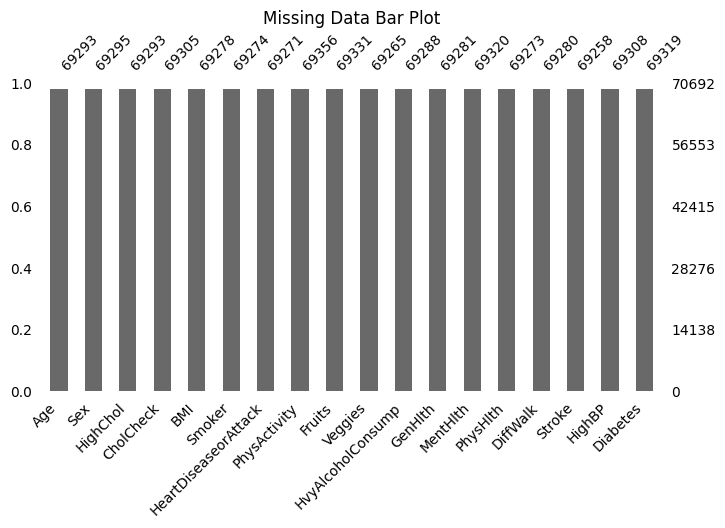

In [14]:
# Generate a bar chart that visualizes the proportion of missing values in the dataset
msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);
plt.title("Missing Data Bar Plot", fontsize=12)
plt.show()


There is a similar proportion of missing data in all columns.

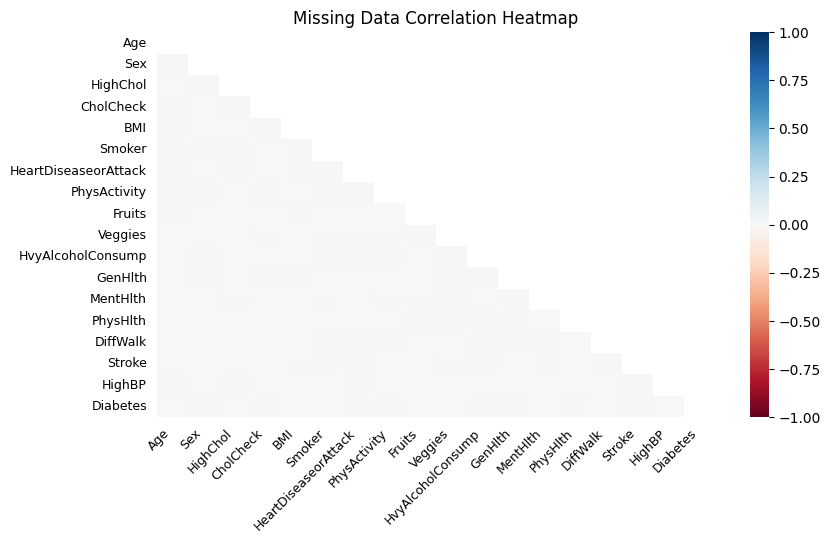

In [15]:
# Generate a heatmap to visualize the correlation of missing data across the columns
msno.heatmap(df = df,
             figsize = (9, 5),
             fontsize = 9)
plt.title("Missing Data Correlation Heatmap", fontsize=12)
plt.show()

It indicates that none of the columns have missing values that are correlated with each other.

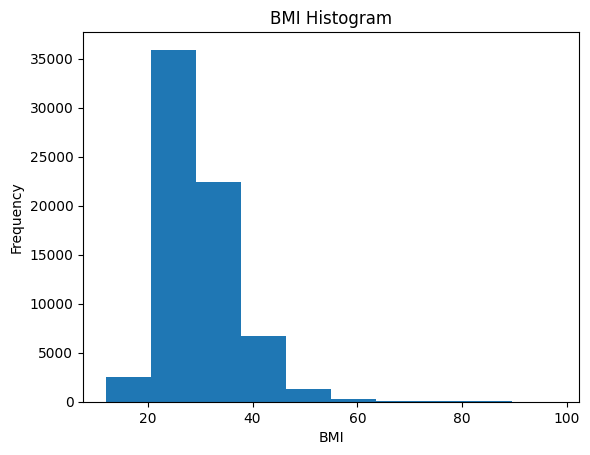

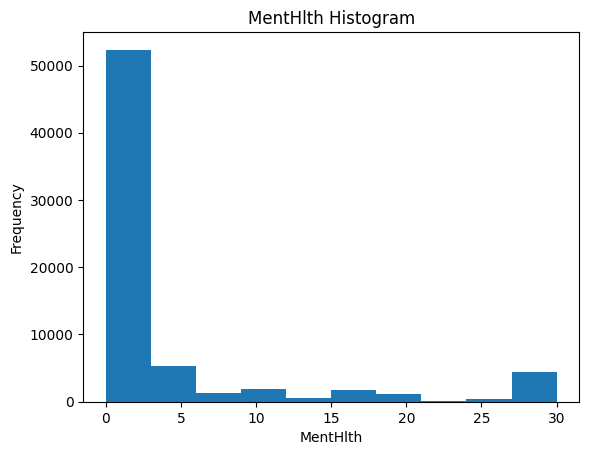

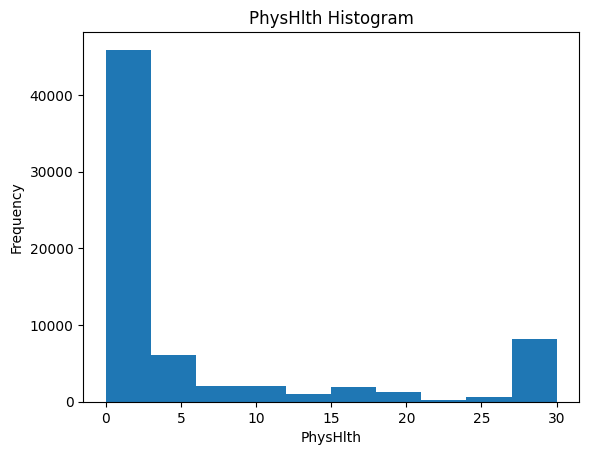

In [16]:
# Generate histograms to visualize the distributions of the values
for col in numerical_columns:
    plt.hist(df[col])
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

To determine how to handle missing values in numerical variables, histograms were examined. Since they do not perfectly match skewed distributions, it seems appropriate to fill them with the mean. Categorical variables will be filled with the mode.

In [17]:
# Fill missing values in numerical columns with the mean 
for col in numerical_columns:
    mean_value = df[col].mean() 
    df[col] = df[col].fillna(mean_value)  

# Fill missing values in categorical columns with the mode
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)
print("The number of missing values for each column is as follows:")
print(df.isnull().sum())

The number of missing values for each column is as follows:
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


In [18]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Statistical Analysis and Data Visualization

## 5.1. Distribution of the Data

In [19]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.613181,0.447872,0.535407,0.975754,29.860966,0.465781,0.144981,0.708977,0.619122,0.793315,0.041801,2.839883,3.757011,5.811803,0.247906,0.060672,0.571790,0.509987
std,2.829106,0.497279,0.498748,0.153813,7.041732,0.498831,0.352084,0.454237,0.485606,0.404931,0.200136,1.102560,8.080546,9.959468,0.431800,0.238729,0.494823,0.499904
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,5.811803,0.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


Upon checking the columns in order, no abnormal values were observed except for BMI. The difference between the mean and maximum BMI values seemed unusual. The accepted BMI ranges are as follows:

* Normal: 18.5 - 24.9
* Overweight: 25 - 29.9
* Obese: 30 and above

Considering these ranges, although the maximum BMI value in the dataset, 98, seems quite high, research indicated that a BMI value of 98 could be valid. Therefore, these values were not altered during the data preprocessing.

Additionally, the analysis values of the Diabetes variable were observed as follows:

* Minimum = 0
* 25% = 0
* 50% = 1
* 75% = 1
* Maximum = 1

From this, it can be inferred that the first half of the dataset contains information about non-diabetic patients, while the second half contains information about diabetic patients.

## 5.2. Data Visualization

### 5.2.1. Relationship Between Numerical Variables and Diabetes

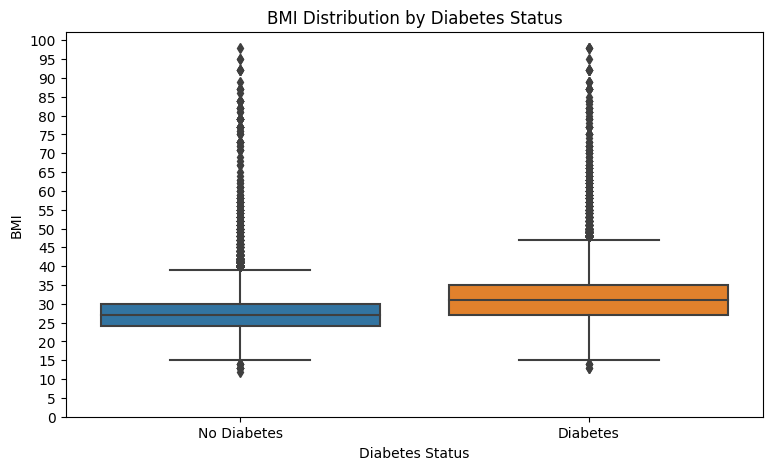

In [20]:
# Generate a boxplot to show the distribution of BMI for each Diabetes status
plt.figure(figsize=(9, 5))
sns.boxplot(x='Diabetes', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

# Define custom y-axis ticks to show BMI values in intervals of 5
bmi_ticks = range(0, int(df['BMI'].max()) + 5, 5)
plt.yticks(bmi_ticks)
plt.show()

The body mass index (BMI) distribution of non-diabetic patients falls within the range of normal weight or overweight individuals, while the BMI distribution of diabetic patients falls within the range of overweight and obese individuals. This indicates that individuals who are not in a healthy weight category are more likely to have diabetes.

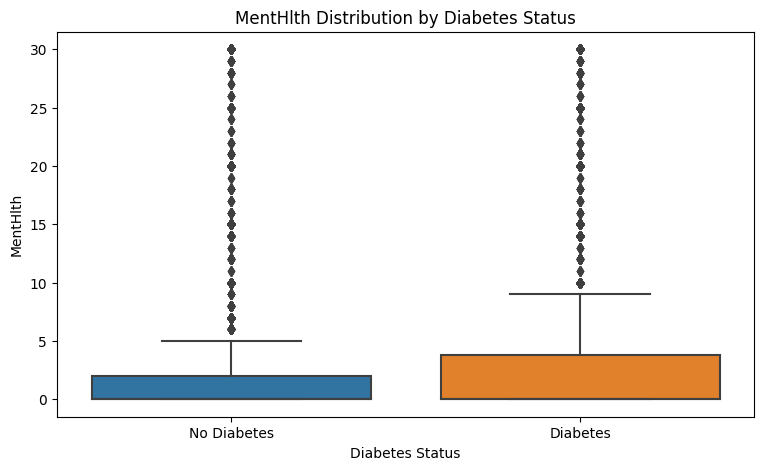

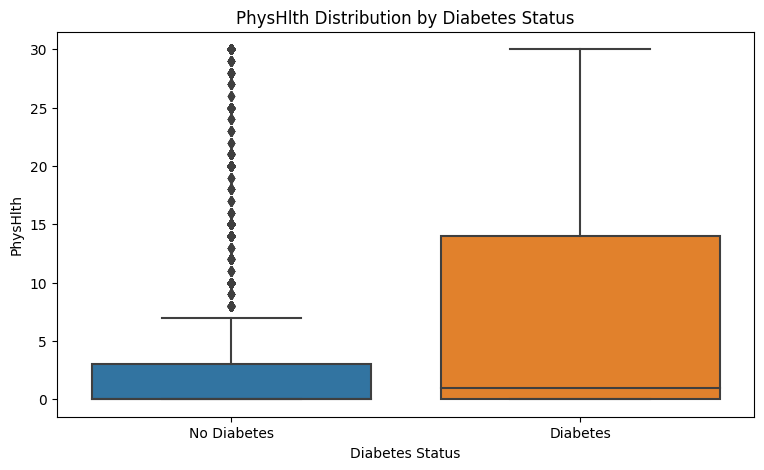

In [21]:
health_info = [
    'MentHlth', 'PhysHlth'
]

# Generate boxplots to show the distribution of MentHlth and PhysHlth for each Diabetes status
for info in health_info:
    plt.figure(figsize=(9, 5))
    sns.boxplot(x='Diabetes', y=info, data=df)
    plt.title(f'{info} Distribution by Diabetes Status')
    plt.xlabel('Diabetes Status')
    plt.ylabel(info)
    plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
    plt.show()

When examining the number of days individuals experienced mental (MentHlth) and physical (PhysHlth) health issues in the last 30 days, grouped by diabetes status, no clear difference is observed for mental health issues. However, there is a clear difference in the distribution of the number of days people with diabetes experienced physical health issues compared to those without diabetes. It can be inferred that individuals with diabetes tend to encounter more physical health problems than those without diabetes.

### 5.2.2. Relationship Between Categorical Variables and Diabetes

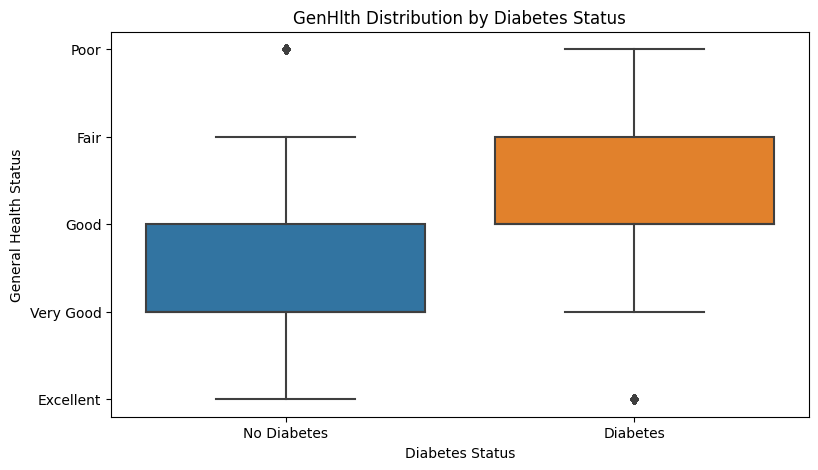

In [22]:
# Generate a boxplot to show the distribution of GenHlth for each Diabetes status
plt.figure(figsize=(9, 5))
sns.boxplot(x='Diabetes', y='GenHlth', data=df)
plt.title('GenHlth Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('General Health Status')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], fontsize=10)
plt.yticks([1, 2, 3, 4, 5], ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], fontsize=10)
plt.show()

According to the graph, the distribution of general health status for diabetes patients is positioned between 'Good' and 'Fair', while for non-diabetes patients, it is between 'Good' and 'Very Good'. It indicates that individuals with poorer general health are more likely to have diabetes.

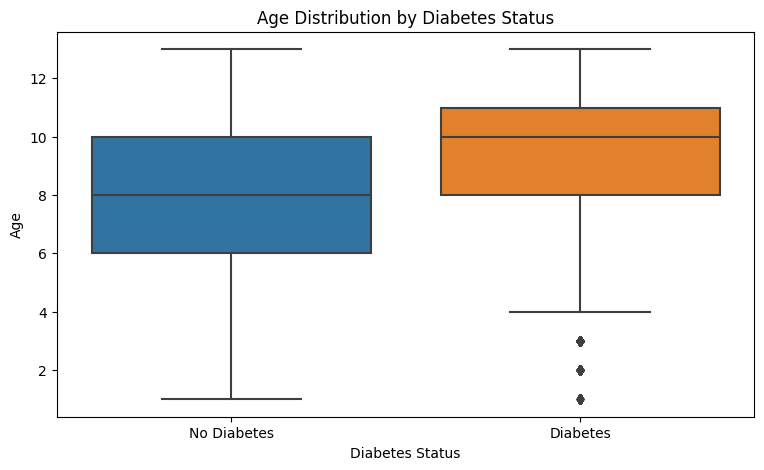

In [23]:
# Generate a boxplot to show the distribution of Age for each Diabetes status
plt.figure(figsize=(9, 5))
sns.boxplot(x='Diabetes', y='Age', data=df)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], fontsize=10)
plt.show()

The average age of diabetic patients is higher compared to those without diabetes. Specifically, the age range of 25-29 (2) and 35-39 (4), which appears as normal values in the graph for non-diabetic individuals, are considered outliers in the graph for diabetic patients. This can be interpreted as a higher probability of diabetes with increasing age.

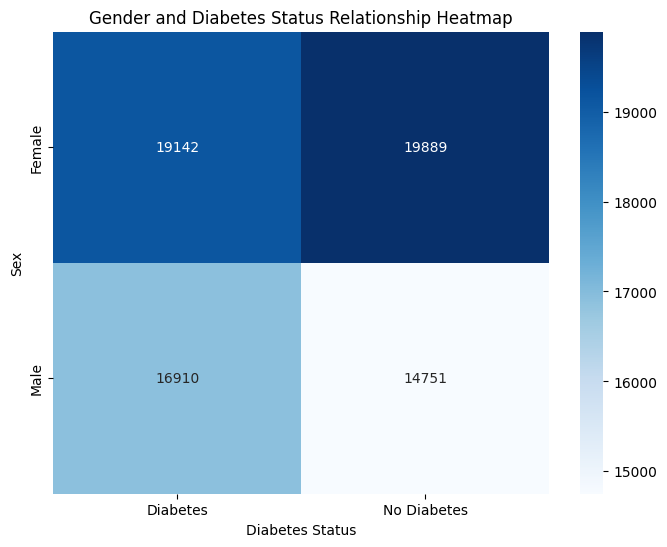

In [24]:
# Generate a heatmap to visualize the relationship between gender and diabetes
contingency_table = pd.crosstab(df['Sex'].map({0: 'Female', 1: 'Male'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Gender and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Sex')
plt.show()

The ratios were calculated instead of directly comparing the numbers because the dataset has unequal counts of men and women, and the ratios provide a more accurate comparison.

In [25]:
# Number of diabetic men and total number of men
diabetic_men = len(df[(df['Sex'] == 1) & (df['Diabetes'] == 1)])  
total_men = len(df[df['Sex'] == 1])

# Number of diabetic women and total number of women
diabetic_women = len(df[(df['Sex'] == 0) & (df['Diabetes'] == 1)]) 
total_women = len(df[df['Sex'] == 0])  

# Calculating the rates
diabetes_rate_men = diabetic_men / total_men
diabetes_rate_women = diabetic_women / total_women

# Display the results
print(f"Diabetes rate for men: {diabetes_rate_men:.3f}")
print(f"Diabetes rate for women: {diabetes_rate_women:.3f}")

Diabetes rate for men: 0.534
Diabetes rate for women: 0.490


The effect of gender on the diabetes rate is limited, and as the data shows, while the diabetes rate is slightly higher in men, the difference compared to women is quite small. Still, gender is not a strong predictor of diabetes when considered alone.

Before examining the relationship between high cholesterol and diabetes, it is important to consider the presence of a variable called CholCheck in the dataset. In the following chart, since it includes individuals who have not had a cholesterol test in the past five years, it is more appropriate to add a second chart that excludes those individuals, to obtain more accurate results.

**Relationship Between High Cholesterol and Diabetes Status for All Patients**

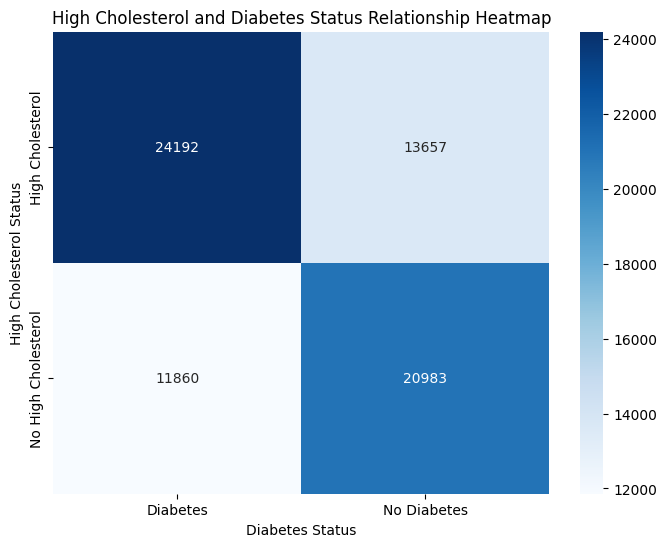

In [26]:
# Generate a heatmap to visualize the relationship between high cholesterol and diabetes
contingency_table = pd.crosstab(df['HighChol'].map({0: 'No High Cholesterol', 1: 'High Cholesterol'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('High Cholesterol and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('High Cholesterol Status')
plt.show()

As seen in the chart, the most significant intersection is between the presence of high cholesterol and the presence of diabetes.

**Relationship Between High Cholesterol and Diabetes Status for Patients Who Have Had a High Cholesterol Test in the Last Five Years**

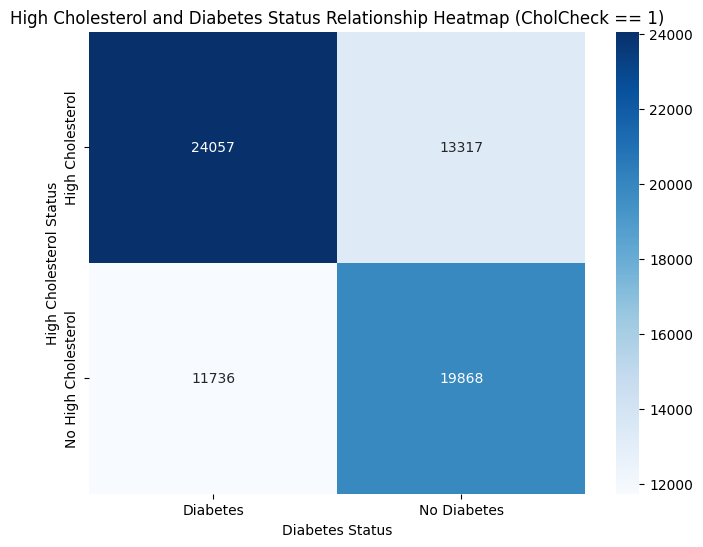

In [27]:
# Generate a heatmap to visualize the relationship between high cholesterol and diabetes
# Only considering patients who have had a cholesterol test in the last five years (CholCheck = 1)
df_filtered = df[df['CholCheck'] == 1]
contingency_table = pd.crosstab(df_filtered['HighChol'].map({0: 'No High Cholesterol', 1: 'High Cholesterol'}),
                                df_filtered['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('High Cholesterol and Diabetes Status Relationship Heatmap (CholCheck == 1)')
plt.xlabel('Diabetes Status')
plt.ylabel('High Cholesterol Status')
plt.show()

This heatmap, which analyzes only patients who have had a high cholesterol test, does not show a significant difference compared to the previous graph. Both graphs reveal a similar relationship, indicating that there is a positive correlation between high cholesterol and diabetes, with patients having high cholesterol being more likely to have diabetes.

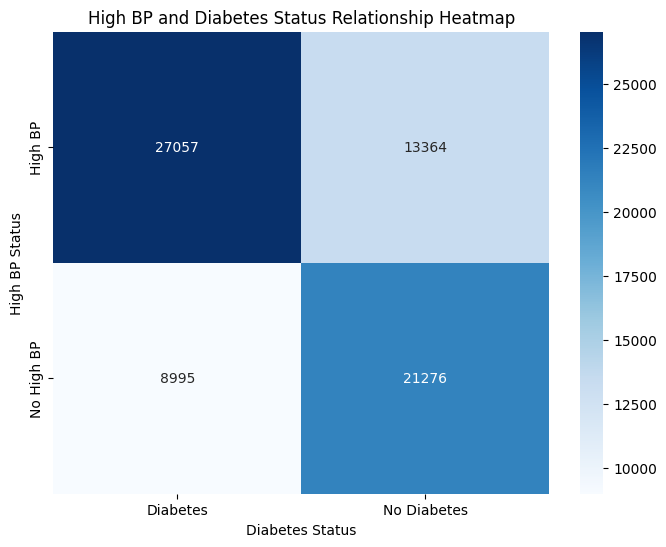

In [28]:
# Generate a heatmap to visualize the relationship between high blood pressure and diabetes
contingency_table = pd.crosstab(df['HighBP'].map({0: 'No High BP', 1: 'High BP'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('High BP and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('High BP Status')
plt.show()

Since a strong correlation has been observed between high blood pressure and diabetes, it indicates that individuals with high blood pressure may have a higher likelihood of having diabetes.

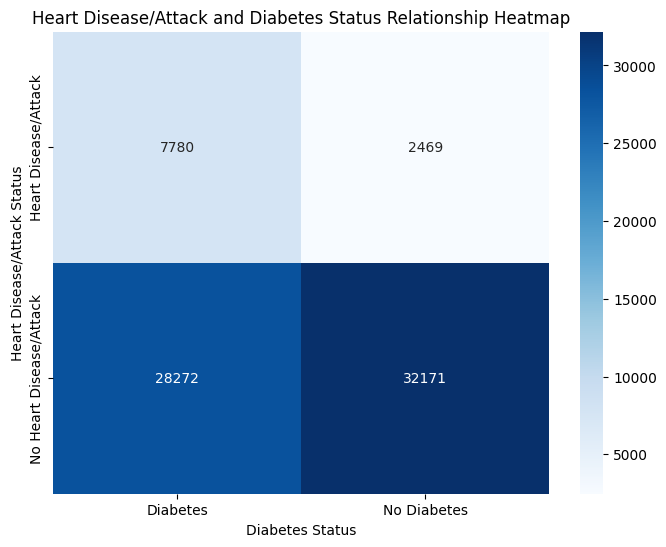

In [29]:
# Generate a heatmap to visualize the relationship between heart disease/attack and diabetes
contingency_table = pd.crosstab(df['HeartDiseaseorAttack'].map({0: 'No Heart Disease/Attack', 1: 'Heart Disease/Attack'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Heart Disease/Attack and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Heart Disease/Attack Status')
plt.show()

The dense areas consist of patients who have or do not have diabetes but have not had heart disease or a heart attack, indicating that heart attack may have an impact on having diabetes but there is no direct connection between heart disease or a heart attack and diabetes.

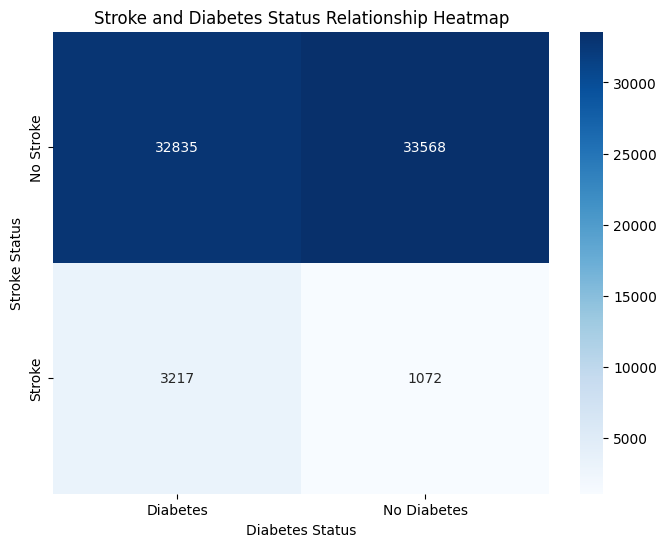

In [30]:
# Generate a heatmap to visualize the relationship between stroke and diabetes
contingency_table = pd.crosstab(df['Stroke'].map({0: 'No Stroke', 1: 'Stroke'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Stroke and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Stroke Status')
plt.show()

The dense areas consist of patients who have or do not have diabetes but have not had stroke, indicating that stroke may have an impact on having diabetes but there is no direct connection between stroke and diabetes.

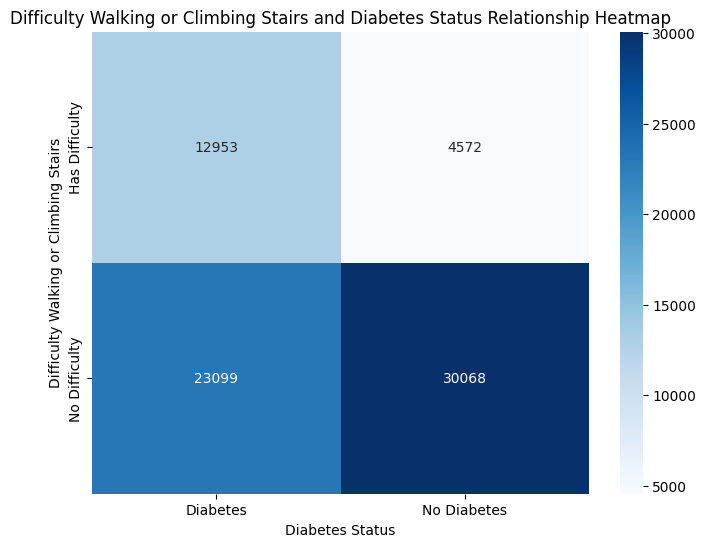

In [31]:
# Generate a heatmap to visualize the relationship between difficulty walking and diabetes
contingency_table = pd.crosstab(df['DiffWalk'].map({0: 'No Difficulty', 1: 'Has Difficulty'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Difficulty Walking or Climbing Stairs and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Difficulty Walking or Climbing Stairs')
plt.show()

The dense areas consist of patients who have or do not have diabetes but have difficulty in walking, indicating that diabetes may have an impact on walking, but it may not be directly related to it.

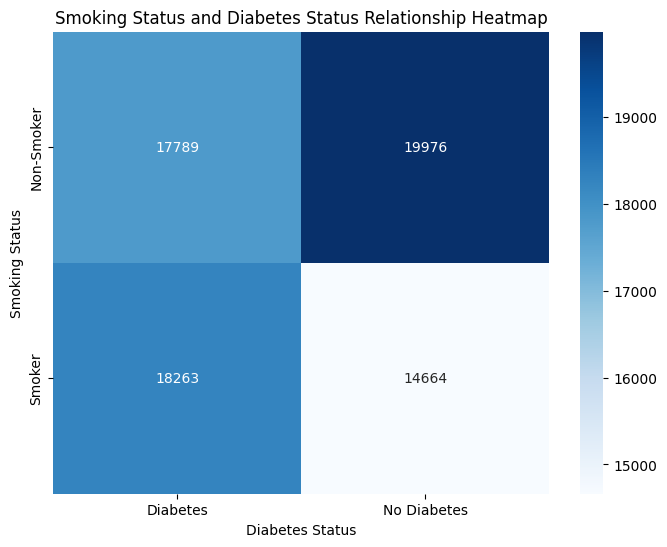

In [32]:
# Generate a heatmap to visualize the relationship between smoking status and diabetes
contingency_table_smoker = pd.crosstab(df['Smoker'].map({0: 'Non-Smoker', 1: 'Smoker'}),
                                       df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_smoker, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Smoking Status and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Smoking Status')
plt.show()

Although the diabetes rate is higher among smokers, there is also a high number of diabetic individuals among non-smokers. It may contribute to an increased risk of developing the condition, but no direct link has been observed between diabetes and smoking.

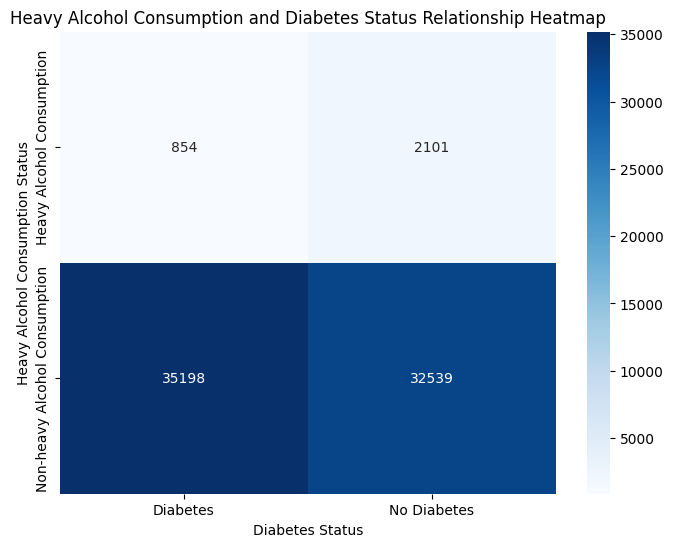

In [33]:
# Generate a heatmap to visualize the relationship between heavy alcohol consumption and diabetes
contingency_table_alcohol = pd.crosstab(df['HvyAlcoholConsump'].map({0: 'Non-heavy Alcohol Consumption', 1: 'Heavy Alcohol Consumption'}),
                                        df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_alcohol, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Heavy Alcohol Consumption and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Heavy Alcohol Consumption Status')
plt.show()

The combination of no heavy alcohol consumption and having diabetes is higher than all other combinations. This group, which makes up almost half of all combinations, shows that there is no direct relationship between heavy alcohol consumption and diabetes. The fact that the rate of having diabetes is lower than the rate of not having diabetes in the case of heavy alcohol consumption supports this conclusion.

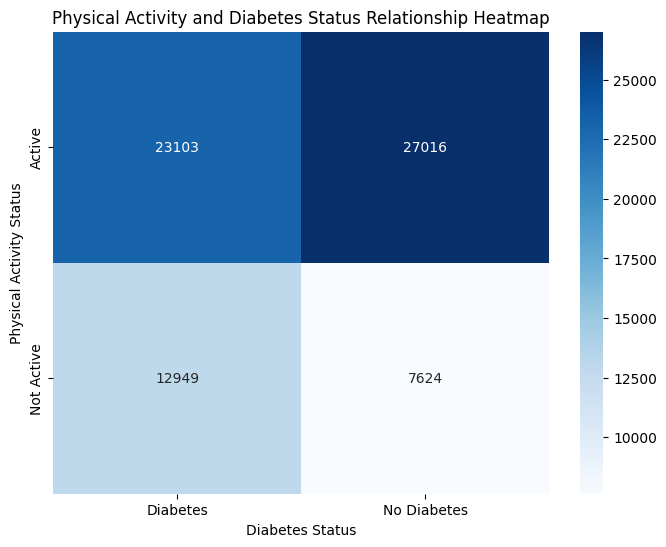

In [34]:
# Generate a heatmap to visualize the relationship between physical activity and diabetes
contingency_table_phys = pd.crosstab(df['PhysActivity'].map({0: 'Not Active', 1: 'Active'}),
                                     df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_phys, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Physical Activity and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Physical Activity Status')
plt.show()

It indicates that physical activity may have a protective effect against diabetes, as more physically active individuals are non-diabetic. On the other hand, physically active individuals have a high proportion of diabetes, which suggests that physical activity may not have a direct connection to diabetes.

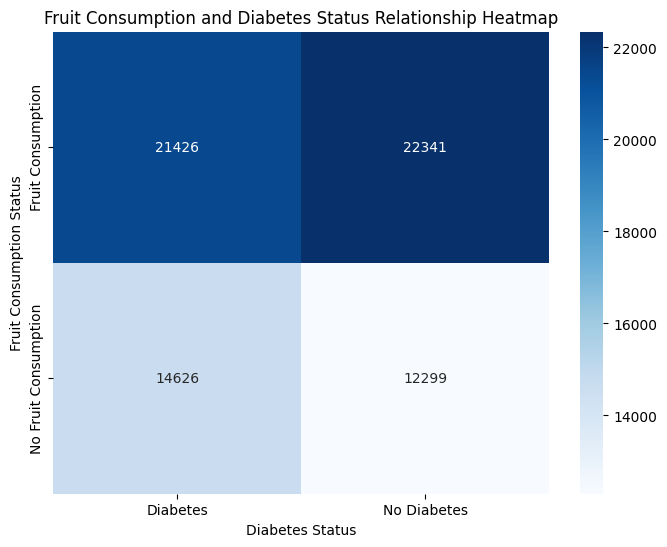

In [35]:
# Generate a heatmap to visualize the relationship between fruit consumption and diabetes
contingency_table_fruits = pd.crosstab(df['Fruits'].map({0: 'No Fruit Consumption', 1: 'Fruit Consumption'}),
                                       df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_fruits, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Fruit Consumption and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Fruit Consumption Status')
plt.show()

The densest area consists of patients who consume fruits and do not have diabetes, suggesting that patients who regularly consume fruits have a lower likelihood of having diabetes. However, since the second densest area, which represents patients who consume fruits and have diabetes, is not significantly distant from the first, it indicates that this variable may not be highly effective in predicting diabetes.

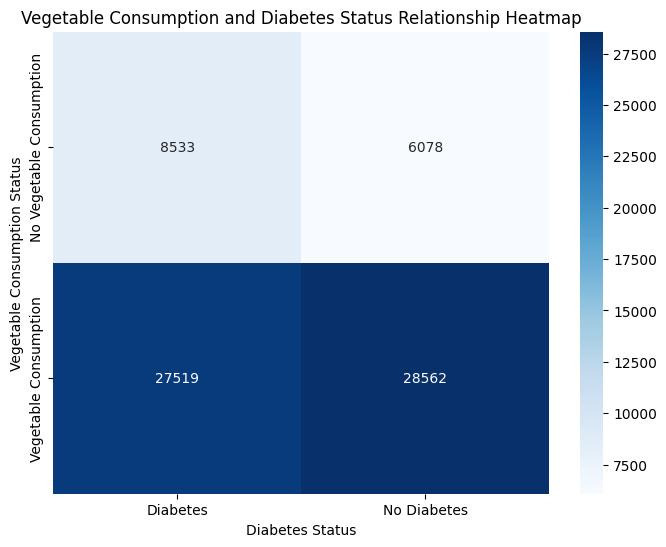

In [36]:
# Generate a heatmap to visualize the relationship between vegetable consumption and diabetes
contingency_table_veggies = pd.crosstab(df['Veggies'].map({0: 'No Vegetable Consumption', 1: 'Vegetable Consumption'}),
                                        df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_veggies, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Vegetable Consumption and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Vegetable Consumption Status')
plt.show()

In the graph, the densest area consists of patients who consume vegetables and do not have diabetes, suggesting that patients who regularly consume vegetables have a lower likelihood of having diabetes. However, since the second densest area, which represents patients who consume vegetables and have diabetes, is not significantly distant from the first, it indicates that this variable may not be highly effective in predicting diabetes.

# 6. Feature Selection & ML Building

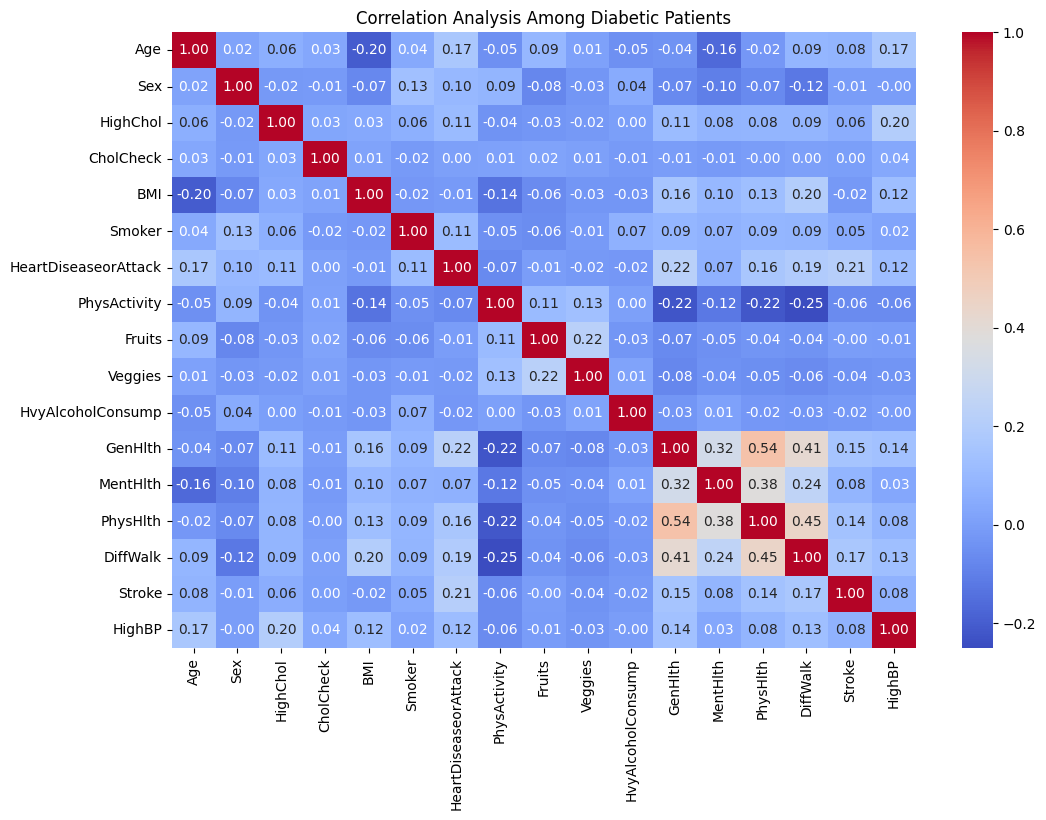

In [37]:
# Generate a heatmap to visualize the correlations between variables in diabetic patients
df_diabetes = df[df['Diabetes'] == 1] # Filter the dataset to include only diabetic patients
df_diabetes_numeric = df_diabetes.drop(columns=['Diabetes']).select_dtypes(include=['float64'])
correlation_matrix = df_diabetes_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Analysis Among Diabetic Patients')
plt.show()

There is a high correlation between PhysHlth, MentHlth, DiffWalk and GenHlth. So some of these variables, which show similar patterns, can be removed. Before, the relationship between these variables and the Diabetes variable should will be reviewed.

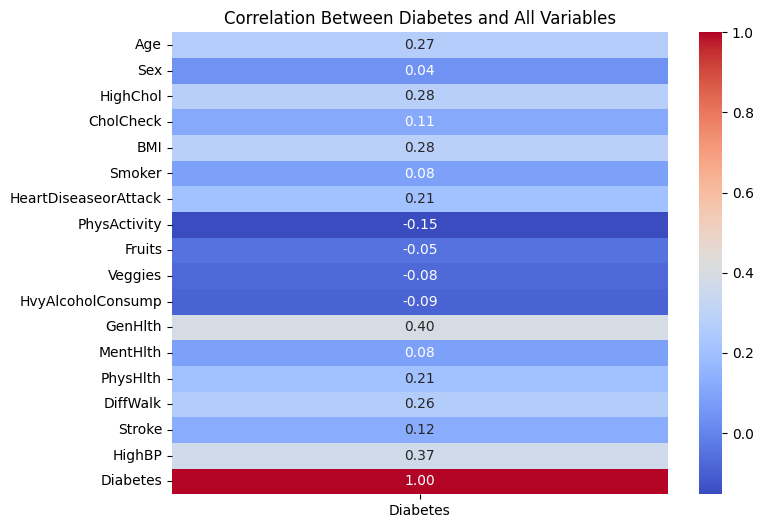

In [38]:
# Generate a heatmap to visualize the correlation between diabetes and all other variables
correlation_matrix = df.corr() 
diabetes_related_corr = correlation_matrix[['Diabetes']]
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_related_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Diabetes and All Variables')
plt.show()

Variables such as GenHlth, HighBP, HighChol, BMI, Age appear to be the most significant predictors in relation to diabetes in this dataset, while factors like Smoker, Fruits, Veggies and HvyAlcoholConsumption show weaker associations.

Since there is a much stronger relationship between GenHlth and Diabetes, the variables PhysHlth and MentHlth will be removed from the dataset. Similarly, as there is a stronger relationship between Diabetes and DiffWalk.

Previously, while examining the relationship between the HighChol variable and Diabetes, it was observed that CholCheck did not cause any significant changes in the results. In the correlation analysis, the value between HighChol and CholCheck is also low. Additionally, CholCheck shows the weak relationship with Diabetes among the variables. Therefore, CholCheck will be removed.

**GridSearchCV**

Grid search technique is used to find the best model for diabetes prediction.

In [39]:
# Split the dataset into features (X) and target (y), then perform train-test split
X = df.drop(['Diabetes'], axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with data scaling and classifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))  # Default model
])

#Define parameter grid for different classifiers and their hyperparameters for GridSearchCV
param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=1000, solver='liblinear')],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9]
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
]

# Set up KFold cross-validation for consistent splitting
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV to tune hyperparameters and find the best model
grid_search = GridSearchCV(pipe, param_grid, cv=cv, n_jobs=1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

Fitting 5 folds for each of 55 candidates, totalling 275 fits
Best parameters: {'classifier': GradientBoostingClassifier(learning_rate=0.2, random_state=42), 'classifier__learning_rate': 0.2, 'classifier__n_estimators': 100}
Best accuracy: 0.7463441040508833


Since the best model is the Gradient Boosting Classifier, it is used to understand which features contribute most to predicting diabetes.

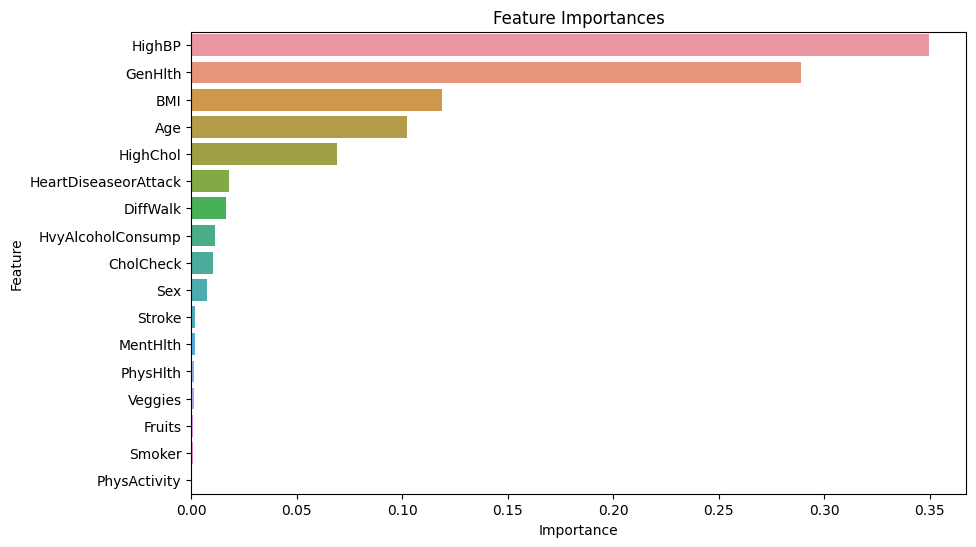

In [40]:
# Fit the Gradient Boosting Classifier model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Get feature importances from the model
importances = model.feature_importances_  
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})  
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))  
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importances)  
plt.title('Feature Importances')  
plt.show() 

According to Gradient Boosting Classifier feature importance, the most important features for predicting diabetes are HighBP, GenHlth, BMI, Age and HighChol.

PhysActivity, Smoker, Fruits have lower importance in predicting diabetes risk.

It is also observed that the variables planned to be removed from the dataset are not among the important features.

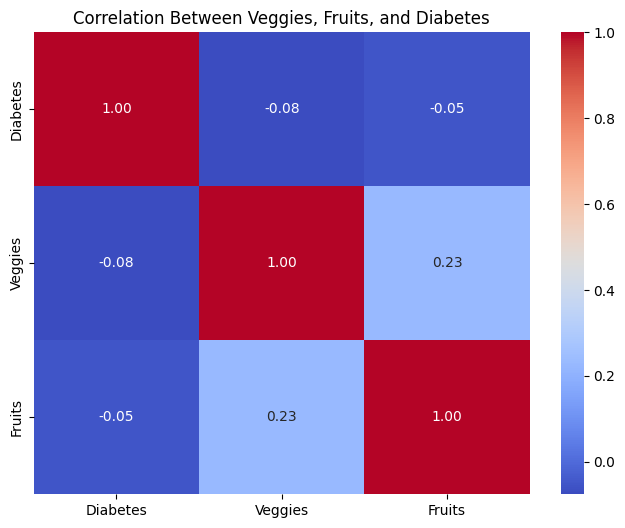

In [41]:
# Generate a correlation matrix for Diabetes, Veggies and Fruits to explore their relationships
correlation_diabetes_veg_fruit = df[['Diabetes', 'Veggies', 'Fruits']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_diabetes_veg_fruit, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Veggies, Fruits, and Diabetes')
plt.show()

When examining the relationship between the Veggies and Fruits variables, which serve similar purposes, and Diabetes, it is observed that they affect diabetes at similar rates. Therefore, these two variables were combined under the question, 'Do you consume at least one fruit or vegetable per day?' to create a new variable named Fruit_Veggie_Consumption.

In [42]:
# Drop the PhysHlth and MentHlth columns from the dataset
df = df.drop(['PhysHlth', 'MentHlth'], axis=1)
print("Remaining columns after dropping PhysHlth and MentHlth:")
df.columns

Remaining columns after dropping PhysHlth and MentHlth:


Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Stroke', 'HighBP',
       'Diabetes'],
      dtype='object')

In [43]:
# Drop the CholCheck column from the dataset
df = df.drop(['CholCheck'], axis=1)
print("Remaining columns after dropping CholCheck:")
df.columns

Remaining columns after dropping CholCheck:


Index(['Age', 'Sex', 'HighChol', 'BMI', 'Smoker', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth',
       'DiffWalk', 'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [44]:
# Convert Fruits and Veggies columns to boolean values
df['Fruits'] = df['Fruits'].astype(bool) 
df['Veggies'] = df['Veggies'].astype(bool)

# Generate a new column Fruit_Veggie_Consumption that is true if either Fruits or Veggies is True
df['Fruit_Veggie_Consumption'] = (df['Fruits'] | df['Veggies']).astype(float)
df = df.drop(['Fruits', 'Veggies'], axis=1)
df.head()

,Age,Sex,HighChol,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,DiffWalk,Stroke,HighBP,Diabetes,Fruit_Veggie_Consumption
0,4.0,1.0,0.0,26.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0
2,13.0,1.0,0.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,11.0,1.0,1.0,28.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0
4,8.0,0.0,0.0,29.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# Calculate the accuracy of the model by comparing the predicted values with the actual test labels
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The model's accuracy was calculated as: {accuracy:.4f}")

The model's accuracy was calculated as: 0.7464


In [46]:
# Print a detailed classification report to evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      6951
         1.0       0.73      0.79      0.76      7188

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



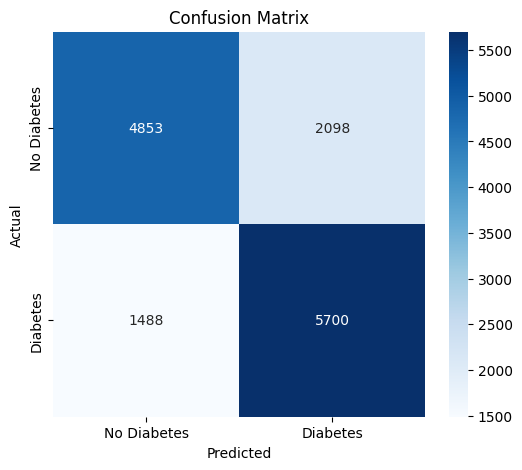

In [47]:
# Generate a confusion matrix to evaluate the model's performance by showing the true vs predicted values
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model's accuracy shows that about two-thirds of the model's predictions are correct.

The recall for diabetic patients is indicating that the model is successful in correctly identifying patients with diabetes. However, the recall for non-diabetic patients is a bit lower, suggesting that the model sometimes misclassifies non-diabetic individuals as diabetic. Similarly, the F1 score for diabetic patients is quite good, but slightly lower for non-diabetic patients. This indicates that the model may produce false positive results in some cases.

These results are also reflected in the confusion matrix, where the same results can be observed.